## Preprocessing

In [3]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import callbacks, layers, models
from keras.models import Sequential
from keras.layers import Dense

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#  Import and read the charity_data.csv.
df_og = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df_og.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [6]:
df_og.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df_og.copy()
df = df.drop(columns=["EIN", "NAME"])
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [8]:
# Determine the number of unique values in each column.
# Skip "ASK_AMT" column because it's already numeric.
cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'IS_SUCCESSFUL']

for col in cols:
  print(col)
  print(df[col].value_counts())
  print()

APPLICATION_TYPE
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

AFFILIATION
AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

CLASSIFICATION
CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

USE_CASE
USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

ORGANIZATION
ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Nam

In [9]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df["APPLICATION_TYPE"].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [10]:
# Choose a cutoff value and create a list of application types to be replaced
app_type_threshold = 200
app_type_counts = df['APPLICATION_TYPE'].value_counts()
app_type_counts.loc[app_type_counts < app_type_threshold].index.tolist()

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [11]:
# use the variable name `application_types_to_replace`
application_types_to_replace = app_type_counts.loc[app_type_counts < 200].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [12]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [13]:
# You may find it helpful to look at CLASSIFICATION value counts > 1
class_threshold = 150
class_counts = df['CLASSIFICATION'].value_counts()
class_counts.loc[class_counts < class_threshold].index.tolist()

['C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [14]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_counts.loc[class_counts < class_threshold].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1003
C7000,777
C1700,287
C4000,194


In [15]:
# Additional bucketing for categories with small sample sizes
print(f"""{df['ORGANIZATION'].value_counts()}\n
{df['USE_CASE'].value_counts()}\n
{df['AFFILIATION'].value_counts()}""")

ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64


In [16]:
# Bucketing for ORGANIZATION
org_threshold = 1000
org_counts = df['ORGANIZATION'].value_counts()
organizations_to_replace = org_counts.loc[org_counts < org_threshold].index.tolist()

# Replace in dataframe
for org in organizations_to_replace:
    df['ORGANIZATION'] = df['ORGANIZATION'].replace(org,"Other")

# Check to make sure replacement was successful
df['ORGANIZATION'].value_counts()

,count
ORGANIZATION,
Trust,23515
Association,10255
Other,529


In [17]:
# Bucketing for USE_CASE
use_case_threshold = 1000
use_case_counts = df['USE_CASE'].value_counts()
use_cases_to_replace = use_case_counts.loc[use_case_counts < use_case_threshold].index.tolist()

# Replace in dataframe
for case in use_cases_to_replace:
    df['USE_CASE'] = df['USE_CASE'].replace(case,"Other")

# Check to make sure replacement was successful
df['USE_CASE'].value_counts()

,count
USE_CASE,
Preservation,28095
ProductDev,5671
Other,533


In [18]:
# Bucketing for AFFILIATION
aff_threshold = 1000
aff_counts = df['AFFILIATION'].value_counts()
affiliations_to_replace = aff_counts.loc[aff_counts < aff_threshold].index.tolist()

# Replace in dataframe
for aff in affiliations_to_replace:
    df['AFFILIATION'] = df['AFFILIATION'].replace(aff,"Other")

# Check to make sure replacement was successful
df['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Other,114


In [19]:
# Drop additional columns with high imbalance yielding no predictive power
df = df.drop(columns=["STATUS", "SPECIAL_CONSIDERATIONS"])
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Other,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Other,Trust,100000-499999,142590,1


In [20]:
# View data types by column
df2 = df.copy()
df2.info()
print(f"\n{df2.columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   USE_CASE          34299 non-null  object
 4   ORGANIZATION      34299 non-null  object
 5   INCOME_AMT        34299 non-null  object
 6   ASK_AMT           34299 non-null  int64 
 7   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.1+ MB

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [21]:
# Convert categorical data to numeric with `pd.get_dummies`
cat_cols = ['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT']
cat_dummies = pd.get_dummies(df2[cat_cols], dtype=int)

# Concatenating with the original DataFrame
df2 = pd.concat([df2, cat_dummies], axis=1)

df2.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,T10,Independent,C1000,ProductDev,Association,0,5000,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
1,T3,Independent,C2000,Preservation,Other,1-9999,108590,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,T3,Independent,C1000,Other,Trust,100000-499999,142590,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   APPLICATION_TYPE              34299 non-null  object
 1   AFFILIATION                   34299 non-null  object
 2   CLASSIFICATION                34299 non-null  object
 3   USE_CASE                      34299 non-null  object
 4   ORGANIZATION                  34299 non-null  object
 5   INCOME_AMT                    34299 non-null  object
 6   ASK_AMT                       34299 non-null  int64 
 7   IS_SUCCESSFUL                 34299 non-null  int64 
 8   APPLICATION_TYPE_Other        34299 non-null  int64 
 9   APPLICATION_TYPE_T10          34299 non-null  int64 
 10  APPLICATION_TYPE_T19          34299 non-null  int64 
 11  APPLICATION_TYPE_T3           34299 non-null  int64 
 12  APPLICATION_TYPE_T4           34299 non-null  int64 
 13  APPLICATION_TYPE

In [23]:
# Split our preprocessed data into our features and target arrays
X = df2.drop(columns=cat_cols + ["IS_SUCCESSFUL"])
y = df2.IS_SUCCESSFUL
X.columns

Index(['ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Independent', 'AFFILIATION_Other', 'CLASSIFICATION_C1000',
       'CLASSIFICATION_C1200', 'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C4000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_Other', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Other', 'ORGANIZATION_Trust',
       'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M'],
      dtype='object')

In [24]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=13)

In [25]:
# Create a StandardScaler instances (scales encoded features as well as ASK_AMT)
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=40, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Third hidden layer
nn1.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 40)                  │           1,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Train the model
history1 = nn1.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6560 - loss: 0.6286 - val_accuracy: 0.7252 - val_loss: 0.5608
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7221 - loss: 0.5639 - val_accuracy: 0.7296 - val_loss: 0.5542
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7303 - loss: 0.5526 - val_accuracy: 0.7294 - val_loss: 0.5520
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7296 - loss: 0.5514 - val_accuracy: 0.7312 - val_loss: 0.5502
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7337 - loss: 0.5420 - val_accuracy: 0.7284 - val_loss: 0.5512
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7278 - loss: 0.5479 - val_accuracy: 0.7312 - val_loss: 0.5520
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7404 - loss: 0.5391 - val_accuracy: 0.7304 - val_loss: 0.5521
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7340 - loss: 0.5455 - val_accu

In [29]:
# Evaluate the model using the test data
model1_loss, model1_accuracy = nn1.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Model 1: Loss: {model1_loss}, Accuracy: {model1_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7311 - loss: 0.5555
Model 1: Loss: 0.5554885268211365, Accuracy: 0.7310787439346313


In [30]:
# Visualize training history
history1_df = pd.DataFrame(history1.history)

# Increase the index by 1 to match the number of epochs
history1_df.index += 1

history1_df.head()

,accuracy,loss,val_accuracy,val_loss
1,0.699541,0.592604,0.725248,0.560812
2,0.727297,0.556417,0.729563,0.554230
3,0.730096,0.551686,0.729446,0.551998
4,0.731263,0.549499,0.731195,0.550185
5,0.731457,0.547835,0.728396,0.551207


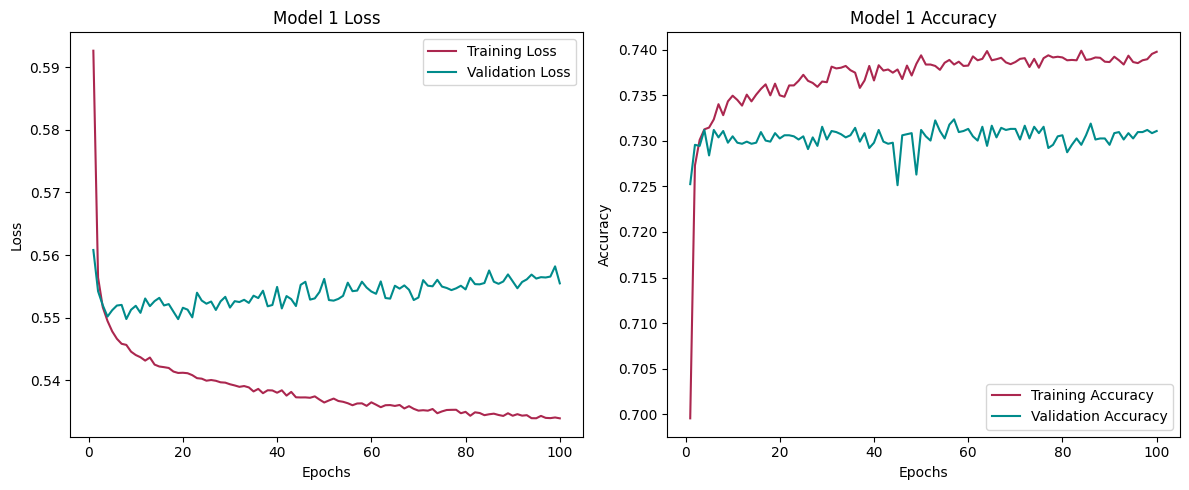

In [31]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history1_df['loss'], label='Training Loss', color="#AB274F")
plt.plot(history1_df['val_loss'], label='Validation Loss', color="#008B8B")
plt.title('Model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history1_df['accuracy'], label='Training Accuracy', color="#AB274F")
plt.plot(history1_df['val_accuracy'], label='Validation Accuracy', color="#008B8B")
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Export our model to HDF5 file
nn1.save("AlphabetSoupCharity.h5")

## Optimization Attempt: Model #2

In [ ]:
# Optimization: increase neurons, add dropout rates, add early stopping rounds

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=len(X.columns)))
nn2.add(tf.keras.layers.Dropout(rate=.2))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=50, activation="relu"))
nn2.add(tf.keras.layers.Dropout(rate=.2))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=25, activation="relu"))
nn2.add(tf.keras.layers.Dropout(rate=.2))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │           3,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,151 (39.65 KB)

 Trainable params: 10,151 (39.65 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.00001, patience=40, restore_best_weights=True, verbose=1)

In [35]:
# Train the model
history2 = nn2.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6841 - loss: 0.6138 - val_accuracy: 0.7280 - val_loss: 0.5585
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7275 - loss: 0.5674 - val_accuracy: 0.7298 - val_loss: 0.5554
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7248 - loss: 0.5645 - val_accuracy: 0.7238 - val_loss: 0.5544
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7288 - loss: 0.5619 - val_accuracy: 0.7297 - val_loss: 0.5517
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7320 - loss: 0.5562 - val_accuracy: 0.7293 - val_loss: 0.5523
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7279 - loss: 0.5574 - val_accuracy: 0.7290 - val_loss: 0.5501
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7335 - loss: 0.5528 - val_accuracy: 0.7306 - val_loss: 0.5506
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7284 - loss: 0.5527 - val_accu

In [36]:
# Evaluate the model using the test data
model2_loss, model2_accuracy = nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Model 1: Loss: {model2_loss}, Accuracy: {model2_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7294 - loss: 0.5487
Model 1: Loss: 0.5486751794815063, Accuracy: 0.7294460535049438


In [37]:
# Visualize training history
history2_df = pd.DataFrame(history2.history)

# Increase the index by 1 to match the number of epochs
history2_df.index += 1

history2_df.head()

,accuracy,loss,val_accuracy,val_loss
1,0.711320,0.589540,0.728047,0.558458
2,0.725587,0.569470,0.729796,0.555371
3,0.727142,0.563240,0.723848,0.554384
4,0.727142,0.560421,0.729679,0.551708
5,0.729513,0.559686,0.729329,0.552350


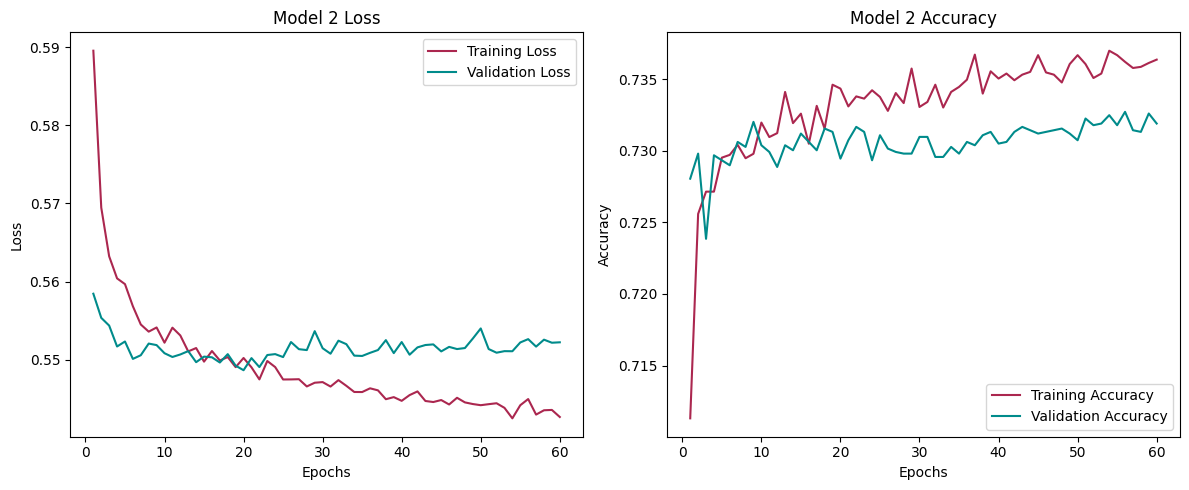

In [38]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history2_df['loss'], label='Training Loss', color="#AB274F")
plt.plot(history2_df['val_loss'], label='Validation Loss', color="#008B8B")
plt.title('Model 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history2_df['accuracy'], label='Training Accuracy', color="#AB274F")
plt.plot(history2_df['val_accuracy'], label='Validation Accuracy', color="#008B8B")
plt.title('Model 2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
# Export our model to HDF5 file
nn2.save("AlphabetSoupCharity2.h5")

## Optimization Attempt: Model #3

In [ ]:
# Optimization: Scale only numeric column, increase neurons, add BatchNormalization, update early stopping parameters

In [40]:
# Scale only the actual numeric column: ASK_AMT
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train["ASK_AMT"].values.reshape(-1,1))

# Scale the data
X_train_scaled = X_train.copy()
X_train_scaled["ASK_AMT"] = X_scaler.transform(X_train["ASK_AMT"].values.reshape(-1,1))

X_test_scaled = X_test.copy()
X_test_scaled["ASK_AMT"] = X_scaler.transform(X_test["ASK_AMT"].values.reshape(-1, 1))

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=250, activation="relu", input_dim=len(X.columns)))
nn3.add(tf.keras.layers.BatchNormalization())
nn3.add(tf.keras.layers.Dropout(rate=.2))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn3.add(tf.keras.layers.BatchNormalization())
nn3.add(tf.keras.layers.Dropout(rate=.2))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=25, activation="relu"))
nn3.add(tf.keras.layers.BatchNormalization())
nn3.add(tf.keras.layers.Dropout(rate=.2))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 250)                 │           9,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 250)                 │           1,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25)                  │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,651 (150.98 KB)

 Trainable params: 37,901 (148.05 KB)

 Non-trainable params: 750 (2.93 KB)

In [42]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])
early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=50, restore_best_weights=True, verbose=1)

In [43]:
# Train the model
history3 = nn3.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - binary_accuracy: 0.6648 - loss: 0.6578 - val_binary_accuracy: 0.7250 - val_loss: 0.5574
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.7215 - loss: 0.5735 - val_binary_accuracy: 0.7226 - val_loss: 0.5550
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.7265 - loss: 0.5638 - val_binary_accuracy: 0.7286 - val_loss: 0.5525
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - binary_accuracy: 0.7253 - loss: 0.5653 - val_binary_accuracy: 0.7300 - val_loss: 0.5531
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.7326 - loss: 0.5576 - val_binary_accuracy: 0.7283 - val_loss: 0.5520
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.7351 - loss: 0.5555 - val_binary_accuracy: 0.7313 - val_loss: 0.5543
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.7280 - loss: 0.5558 - val_binary_accuracy: 0.7305 - val_loss: 0.5516

In [45]:
# Evaluate the model using the test data
model3_loss, model3_accuracy = nn3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Model 3: Loss: {model3_loss}, Accuracy: {model3_accuracy}")

268/268 - 0s - 2ms/step - binary_accuracy: 0.7317 - loss: 0.5486
Model 3: Loss: 0.5485572814941406, Accuracy: 0.7316617965698242


In [46]:
# Visualize training history
history3_df = pd.DataFrame(history3.history)

# Increase the index by 1 to match the number of epochs
history3_df.index += 1

history3_df.head()

,binary_accuracy,loss,val_binary_accuracy,val_loss
1,0.688890,0.615868,0.725015,0.557366
2,0.719056,0.572607,0.722566,0.554959
3,0.725393,0.565155,0.728630,0.552507
4,0.724848,0.564050,0.730029,0.553086
5,0.729513,0.561824,0.728280,0.551986


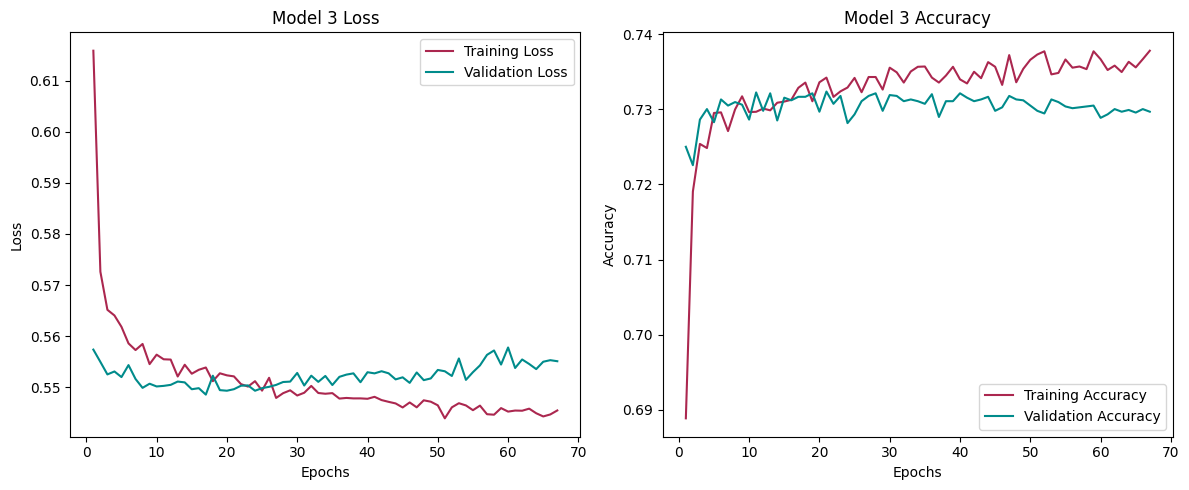

In [47]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history3_df['loss'], label='Training Loss', color="#AB274F")
plt.plot(history3_df['val_loss'], label='Validation Loss', color="#008B8B")
plt.title('Model 3 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history3_df['binary_accuracy'], label='Training Accuracy', color="#AB274F")
plt.plot(history3_df['val_binary_accuracy'], label='Validation Accuracy', color="#008B8B")
plt.title('Model 3 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [48]:
# Export our model to HDF5 file
nn3.save("AlphabetSoupCharity3.h5")

## New Preprocessing for Optimization Attempt 4

In [ ]:
# Optimization: Keep and bucket name column.

In [49]:
df_og.columns

Index(['EIN', 'NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION',
       'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT',
       'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [50]:
# Drop the non-beneficial columns
df3 = df_og.copy()
df3 = df3.drop(columns=["EIN", "STATUS", "SPECIAL_CONSIDERATIONS"])
df3.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [51]:
df3.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [52]:
# Determine the number of unique values in each column.
# Skip "ASK_AMT" column because it's already numeric.
cols = ['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT']

for col in cols:
  print(col)
  print(df3[col].value_counts())
  print()

NAME
NAME
PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: count, Length: 19568, dtype: int64

APPLICATION_TYPE
APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8

In [53]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
# Choose a cutoff value and create a list of application types to be replaced
app_type_threshold = 200
app_type_counts = df3['APPLICATION_TYPE'].value_counts()

# use the variable name `application_types_to_replace`
application_types_to_replace = app_type_counts.loc[app_type_counts < app_type_threshold].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df3['APPLICATION_TYPE'] = df3['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df3['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [54]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
class_threshold = 150
class_counts = df3['CLASSIFICATION'].value_counts()

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_counts.loc[class_counts < class_threshold].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df3['CLASSIFICATION'] = df3['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df3['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1003
C7000,777
C1700,287
C4000,194


In [55]:
# Additional bucketing for categories with small sample sizes
print(f"""{df3['ORGANIZATION'].value_counts()}\n
{df3['USE_CASE'].value_counts()}\n
{df3['AFFILIATION'].value_counts()}""")

ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64


In [56]:
# Bucketing for ORGANIZATION
org_threshold = 1000
org_counts = df3['ORGANIZATION'].value_counts()
organizations_to_replace = org_counts.loc[org_counts < org_threshold].index.tolist()

# Replace in dataframe
for org in organizations_to_replace:
    df3['ORGANIZATION'] = df3['ORGANIZATION'].replace(org,"Other")

# Check to make sure replacement was successful
df3['ORGANIZATION'].value_counts()

,count
ORGANIZATION,
Trust,23515
Association,10255
Other,529


In [57]:
# Bucketing for USE_CASE
use_case_threshold = 1000
use_case_counts = df3['USE_CASE'].value_counts()
use_cases_to_replace = use_case_counts.loc[use_case_counts < use_case_threshold].index.tolist()

# Replace in dataframe
for case in use_cases_to_replace:
    df3['USE_CASE'] = df3['USE_CASE'].replace(case,"Other")

# Check to make sure replacement was successful
df3['USE_CASE'].value_counts()

,count
USE_CASE,
Preservation,28095
ProductDev,5671
Other,533


In [58]:
# Bucketing for AFFILIATION
aff_threshold = 1000
aff_counts = df3['AFFILIATION'].value_counts()
affiliations_to_replace = aff_counts.loc[aff_counts < aff_threshold].index.tolist()

# Replace in dataframe
for aff in affiliations_to_replace:
    df3['AFFILIATION'] = df3['AFFILIATION'].replace(aff,"Other")

# Check to make sure replacement was successful
df3['AFFILIATION'].value_counts()

,count
AFFILIATION,
Independent,18480
CompanySponsored,15705
Other,114


In [59]:
# Bucketing for NAME
name_threshold = 250
name_counts = df3['NAME'].value_counts()
names_to_replace = name_counts.loc[name_counts < name_threshold].index.tolist()

# Replace in dataframe
for name in names_to_replace:
    df3['NAME'] = df3['NAME'].replace(name,"Other")

# Check to make sure replacement was successful
df3['NAME'].value_counts()

,count
NAME,
Other,28539
PARENT BOOSTER USA INC,1260
TOPS CLUB INC,765
UNITED STATES BOWLING CONGRESS INC,700
WASHINGTON STATE UNIVERSITY,492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,408
PTA TEXAS CONGRESS,368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,331
ALPHA PHI SIGMA,313


In [60]:
df3.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Other,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,Other,T3,Independent,C2000,Preservation,Other,1-9999,108590,1
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,Other,T3,Independent,C1000,Other,Trust,100000-499999,142590,1


In [61]:
# View data types by column
df4 = df3.copy()
df4.info()
print(f"\n{df4.columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              34299 non-null  object
 1   APPLICATION_TYPE  34299 non-null  object
 2   AFFILIATION       34299 non-null  object
 3   CLASSIFICATION    34299 non-null  object
 4   USE_CASE          34299 non-null  object
 5   ORGANIZATION      34299 non-null  object
 6   INCOME_AMT        34299 non-null  object
 7   ASK_AMT           34299 non-null  int64 
 8   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.4+ MB

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [62]:
# Convert categorical data to numeric with `pd.get_dummies`
cat_cols = ['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT']
cat_dummies = pd.get_dummies(df4[cat_cols], dtype=int)

# Concatenating with the original DataFrame
df4 = pd.concat([df4, cat_dummies], axis=1)

df4.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL,NAME_ALPHA PHI SIGMA,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS,NAME_LITTLE LEAGUE BASEBALL INC,NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS,NAME_Other,NAME_PARENT BOOSTER USA INC,NAME_PTA TEXAS CONGRESS,NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC,NAME_TOASTMASTERS INTERNATIONAL,NAME_TOPS CLUB INC,NAME_UNITED STATES BOWLING CONGRESS INC,NAME_WASHINGTON STATE UNIVERSITY,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,AFFILIATION_Other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Other,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,Other,T10,Independent,C1000,ProductDev,Association,0,5000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
1,Other,T3,Independent,C2000,Preservation,Other,1-9999,108590,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,Other,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
3,Other,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,Other,T3,Independent,C1000,Other,Trust,100000-499999,142590,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [63]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 58 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   NAME                                                    34299 non-null  object
 1   APPLICATION_TYPE                                        34299 non-null  object
 2   AFFILIATION                                             34299 non-null  object
 3   CLASSIFICATION                                          34299 non-null  object
 4   USE_CASE                                                34299 non-null  object
 5   ORGANIZATION                                            34299 non-null  object
 6   INCOME_AMT                                              34299 non-null  object
 7   ASK_AMT                                                 34299 non-null  int64 
 8   IS_SUCCESSFUL                                 

In [64]:
# Split our preprocessed data into our features and target arrays
X = df4.drop(columns=cat_cols + ["IS_SUCCESSFUL"])
y = df4.IS_SUCCESSFUL
X.columns

Index(['ASK_AMT', 'NAME_ALPHA PHI SIGMA',
       'NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC',
       'NAME_INTERNATIONAL ASSOCIATION OF LIONS CLUBS',
       'NAME_LITTLE LEAGUE BASEBALL INC',
       'NAME_MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS', 'NAME_Other',
       'NAME_PARENT BOOSTER USA INC', 'NAME_PTA TEXAS CONGRESS',
       'NAME_SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC',
       'NAME_TOASTMASTERS INTERNATIONAL', 'NAME_TOPS CLUB INC',
       'NAME_UNITED STATES BOWLING CONGRESS INC',
       'NAME_WASHINGTON STATE UNIVERSITY', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent',
       'AFFILIATION_Other', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000', 'CLAS

In [65]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=13)

## Optimization Attempt: Model #4

In [66]:
# Optimization: Scale only numeric column, keep other parameters consistent with Attempt #3 to compare changes with preprocessing

In [67]:
# Scale only the actual numeric column: ASK_AMT
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train["ASK_AMT"].values.reshape(-1,1))

# Scale the data
X_train_scaled = X_train.copy()
X_train_scaled["ASK_AMT"] = X_scaler.transform(X_train["ASK_AMT"].values.reshape(-1,1))

X_test_scaled = X_test.copy()
X_test_scaled["ASK_AMT"] = X_scaler.transform(X_test["ASK_AMT"].values.reshape(-1, 1))

In [68]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=250, activation="relu", input_dim=len(X.columns)))
nn4.add(tf.keras.layers.BatchNormalization())
nn4.add(tf.keras.layers.Dropout(rate=.2))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=100, activation="relu"))
nn4.add(tf.keras.layers.BatchNormalization())
nn4.add(tf.keras.layers.Dropout(rate=.2))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=25, activation="relu"))
nn4.add(tf.keras.layers.BatchNormalization())
nn4.add(tf.keras.layers.Dropout(rate=.2))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 250)                 │          12,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 250)                 │           1,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          25,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 25)                  │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,901 (163.68 KB)

 Trainable params: 41,151 (160.75 KB)

 Non-trainable params: 750 (2.93 KB)

In [69]:
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
early_stopping = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.0001, patience=50, restore_best_weights=True, verbose=1)

In [70]:
# Train the model
history4 = nn4.fit(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6864 - loss: 0.6269 - val_accuracy: 0.7460 - val_loss: 0.5126
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7289 - loss: 0.5415 - val_accuracy: 0.7486 - val_loss: 0.5084
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7440 - loss: 0.5229 - val_accuracy: 0.7445 - val_loss: 0.5105
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7505 - loss: 0.5168 - val_accuracy: 0.7494 - val_loss: 0.5080
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7466 - loss: 0.5164 - val_accuracy: 0.7476 - val_loss: 0.5121
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7513 - loss: 0.5209 - val_accuracy: 0.7482 - val_loss: 0.5073
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7486 - loss: 0.5139 - val_accuracy: 0.7481 - val_loss: 0.5086
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7490 - loss: 0.5134 - val_a

In [71]:
# Evaluate the model using the test data
model4_loss, model4_accuracy = nn4.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Model 4: Loss: {model4_loss}, Accuracy: {model4_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7513 - loss: 0.5039
Model 4: Loss: 0.503857433795929, Accuracy: 0.7512536644935608


In [72]:
# Visualize training history
history4_df = pd.DataFrame(history4.history)

# Increase the index by 1 to match the number of epochs
history4_df.index += 1

history4_df.head()

,accuracy,loss,val_accuracy,val_loss
1,0.709765,0.579001,0.746006,0.512606
2,0.735228,0.534727,0.748571,0.508395
3,0.743119,0.526342,0.744490,0.510495
4,0.743119,0.522347,0.749388,0.507976
5,0.745335,0.520000,0.747638,0.512102


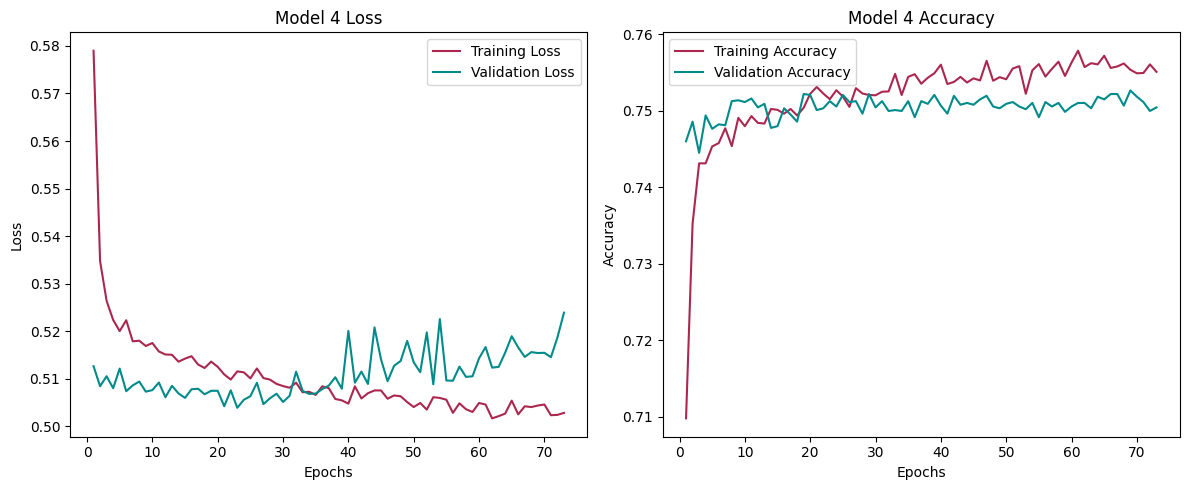

In [73]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history4_df['loss'], label='Training Loss', color="#AB274F")
plt.plot(history4_df['val_loss'], label='Validation Loss', color="#008B8B")
plt.title('Model 4 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history4_df['accuracy'], label='Training Accuracy', color="#AB274F")
plt.plot(history4_df['val_accuracy'], label='Validation Accuracy', color="#008B8B")
plt.title('Model 4 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [74]:
# Export our model to HDF5 file
nn4.save("AlphabetSoupCharity4.h5")